### 13-2 Minimum Energy Control

Consider the discrete-time linear dynamical system
x(t + 1) = Ax(t) + Bu(t),
t = 0, 1, 2, . . .
where x(t) ∈ R n , and the input u(t) is a scalar (hence, A ∈ R n×n and B ∈ R n×1 ). The initial state
is x(0) = 0.

(a) Find the matrix C T such that


u(T − 1)


.


.
x(T ) = C T 
 .
 u(1) 
u(0)

(b) For the remainder of this problem, we consider a specific system with
input matrices are



0.5
0.7 −0.9 −0.5
1
 0.4 −0.7

 1
0.1
0.3
 , B = 
A = 
 0.7
 0
0.0 −0.6
0.1 
0.4 −0.1
0.8 −0.5
0
n = 4. The dynamics and


 .

Suppose we want the state to be x des at time T . Consider the desired state


0.8
 2.3 

x des = 
 −0.7  .
−0.3

What is the smallest T for which we can find inputs u(0), . . . , u(T − 1), such that x(T ) = x des ?
What are the corresponding inputs that achieve x des at this minimum time? What is the smallest
T for which we can find inputs u(0), . . . , u(T − 1), such that x(T ) = x des for any x des ∈ R 4 ? We’ll
denote this T by T min .

(c) Suppose the energy expended in applying inputs u(0), . . . , u(T − 1) is
E(T ) =
T
−1
X
2
(u(t)) .
t=0
For a given T (greater than T min ) and x des , how can you compute the inputs which achieve
x(T ) = x des with the minimum expense of energy? Consider now the desired state


−1
 1 

x des = 
 0  .
1
For each T ranging from T min to 30, find the minimum energy inputs that achieve x(T ) = x des .
For each T , evaluate the corresponding input energy, which we denote by E min (T ). Plot E min (T )
as a function of T . (You should include in your solution a description of how you computed the
minimum-energy inputs, and the plot of the minimum energy as a function of T . But you don’t
need to list the actual inputs you computed!)

(d) You should observe that E min (T ) is non-increasing in T . Show that this is the case in general
(i.e., for any A, B, and x des ).

Note: There is a direct way of computing the assymptotic limit of the minimum energy as T → ∞.
We’ll cover these ideas in more detail in ee363.

#### Answers 

### (A)

x(T) = [B AB $A^2B \cdots{}  A^{T-1}B$  ] [u(T-1) u(T-2) .. .$]^T$

### (B)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
A = np.asarray([[0.5,0.7,-0.9,-0.5],[0.4,-0.7,0.1,0.3],
                [0.7,0.0,-0.6,0.1],[0.4,-0.1,0.8,-0.5]])
B = np.asarray([1,1,0,0])
B = B[:,np.newaxis]

In [5]:
x_des = np.asarray([0.8,2.3,-0.7,-0.3])
x_des[:, np.newaxis]

array([[ 0.8],
       [ 2.3],
       [-0.7],
       [-0.3]])

In [6]:
np.linalg.matrix_rank(A)

4

In [7]:
# The question is the matrix given above how [B A^2B ...] 
# should have how many columns to say that x(T) lies in the range.

A.dot(B)

array([[ 1.2],
       [-0.3],
       [ 0.7],
       [ 0.3]])

In [8]:
fu = lambda A : A.T.dot(np.linalg.inv(A.dot(A.T)))


4.96367189715 @ 29


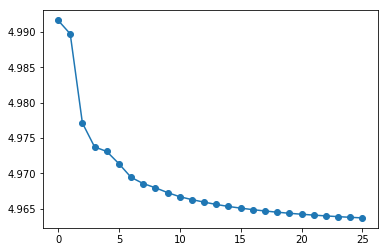

In [18]:
J = np.asarray([])
# J = x_des
J = B
#print(J)
uu = []
for i in range(1,30):
    c = np.linalg.matrix_power(A,i).dot(B)
    
    J = np.append(J,c,axis=1)
    #print(fu(J).shape)
    #print(np.linalg.matrix_rank(J))

    if i > 3:
    
        u = fu(J).dot(x_des)

        #print(u)
        uu.append(np.linalg.norm(u)**2)
    
plt.plot(uu,'-o')

print(np.min(uu),'@',4+np.argmin(uu))


### (D)

Adding extra column does not increases rank, which implies that full rank or max rank that is needed to get designed solution does not make underdetermined solution determined. Adding more variable can achieve that same solution as earlier or infact lesser that that.


$$[J_k\ A^k B][u_{min}\ 0]^T$$ 

also has solution for the min and less.